In [1]:
from diffusers import StableDiffusionInpaintPipeline
import torch
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

/home/btech/nityanand.mathur/anaconda3/envs/inpainting/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


text_encoder/model.safetensors not found
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
Loading pipeline components...: 100%|██████████| 7/7 [00:11<00:00,  1.64s/it]


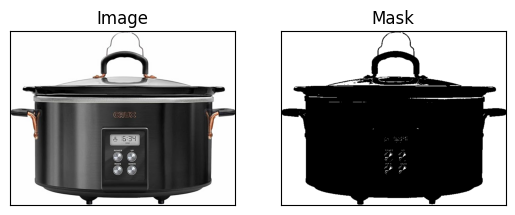

100%|██████████| 50/50 [01:13<00:00,  1.48s/it]


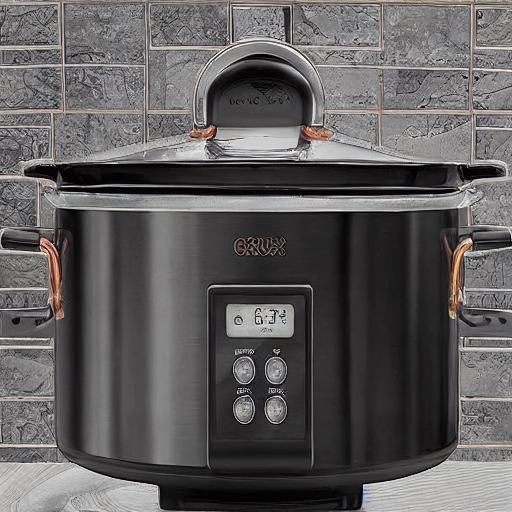

In [5]:
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float32
)

# Define a white threshold
lower = np.array([220, 220, 220])
upper = np.array([255, 255, 255])

image = Image.open("/home/btech/nityanand.mathur/Inpainting/data/examples/example1.jpg")

image_cv2 = np.array(image)
image_cv2 = cv2.cvtColor(image_cv2, cv2.COLOR_RGB2BGR)

mask = cv2.inRange(image_cv2, lower, upper)
mask = Image.fromarray(mask)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(image)
ax[0].set_title("Image")
ax[0].set_xticks([])  # remove x-axis labels
ax[0].set_yticks([])  # remove y-axis labels
ax[1].imshow(mask, cmap="gray")
ax[1].set_title("Mask")
ax[1].set_xticks([])  # remove x-axis labels
ax[1].set_yticks([])  # remove y-axis labels
# plt.savefig("combined.png")
plt.show()

prompt = "product on a center table on a kitchen counter"

image = pipe(prompt=prompt, image=image, mask_image=mask, torch_device="cuda").images[0]
display(image)
# image.save("./yellow_cat_on_park_bench.png")
